<center> <h2> DS 3000 - Fall 2021</h2> </center>
<center> <h3> DS Report </h3> </center>

<center> <h3> Predicting Airbnb Scores Through User Submitted Reviews </h3> </center>
<center><h4>Don Kim, Glen Damian Lim, Jason Fujii</h4></center>

### Important links for this project:

Github Repository Link: https://github.com/glendamian/rate_this_airbnb/tree/v1

Google Colab Link: https://colab.research.google.com/drive/1GIptSdCmCNIryVXuVImEZsToMyRKCRN6?usp=sharing

<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

In this project, we will be looking at a dataset that we have cleaned ourselves about Airbnb listings. The Airbnb listings will be strictly in the Boston area for the sake of keeping the project at a reasonable scale. We will be predicting a binary value of whether a user should stay at a 'Best' listing or just a 'Decent' listing. This prediction will be made using the feature variables of text reviews and the ratings given by users out of a score of 5. The machine learning algorithms we will be using in this project are Logistic Regression Multinomial, Naive Bayes, and Decision Tree.

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

<h4>Problem Statement</h4>
  
  The topic of our project is Airbnb listings located throughout the Boston area. We are looking at listings in the Boston area for the sake of keeping this project in a doable scale. The problem we would like to tackle in this topic is to find a better metric for determining the best Airbnb listings a user should stay at. We as a group want to learn the average ratings users give these listings and if there is any relationship as to why these listings are more highly rated.

<h4>Significance of the Problem</h4>

  A simple 5 star rating is too vague of a factor to determine whether an Airbnb is the best place for a user to stay at. Furthermore, going through all written reviews isn’t feasible. Therefore, we have taken it upon us to use machine learning algorithms to go through a large pool of diverse user reviews of Airbnb listings to efficiently give users a proper "Best" or "Decent" answer as to whether they should stay at a listing. We give these two strings as options because the average scores for the listings are very high by nature so we are trying to pinpoint which listings are the best to stay at.
  
  The insights we can gather from this project are what kind of keywords and reviews differentiate "excellent" Airbnb's from the "decent" ones, or if there is no difference in the keywords, at all. We can figure this out by analyzing our data after our machine learning algorithms are applied. We will be going through the text within the reviews given by users and use feature extraction using text to determine how accurate the 5 star ratings are. We can also possibly see if there is any specific location that has a more favored amount of listings that generate a positive score using our metric.

<h4>Questions</h4>

* Out of the three algorithms (Logistic Regression, Multinomial Naive Bayes, Decision Tree), which one yields the highest classification accuracy result? Which one out of the three algorithms can we use to predict whether a listing is a "Best" place to stay in or just a "Decent" place to stay in.

* How many "Best" listings are there relative to how many "Decent" listings. Is there a wide difference?

* Do the results change at all when run with a different instance? This can situation can possibly arise as new reviews are constantly being written every day for each listing on Airbnb. Or is it the case that these new entries do not skew the results of our algorithms?

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition
  
  We obtained our data through a website called "insideairbnb" that provides datasets for Airbnb listings around the world.
  You can find csv files containing information on the listings, reviews, calenders and neighbourhoods of a particular city.
  Below attached is the link to the source:
  
  http://insideairbnb.com/get-the-data.html

The listings.csv dataset describes for a given Airbnb certain variables such as the overall cleanliness rating, how many reviews per month and etc. for a total of about 70 variables by which each Airbnb is reviewed. The amount of samples included in the listings.csv is 3429, suggesting that for the most recent dataset for Boston there are 3429 Airbnbs reviewe. 

In the reviews.csv there are 126679 rows suggesting that there are 126679 total reviews they have accumulated for Boston. This also includes an ID for the Airbnb, such that we can match the two datasets on one Airbnb.

We decided to pick 1200 random Airbnb's from the listings.csv, and select one comment from the 126679 for each such that in our final dataframe, there are 1200 individual Airbnbs with one comment matched by their unique ID.

### 2.2. Data Analysis

The predictive model we are creating for this project will be a multiple regression model as we will be using supervised learning in this project. The outcome variable we will be going to predict is a binary value of whether a user should stay at an Airbnb listing or not. The feature variable that will be used to predict this outcome variable are the text reviews the user submits, the user rating score given out of 5, and the id of the listing.

This is a supervised learning problem, which is sub-categorized to regression. We will be seeking to obtain a continuous output variable

The machine learning algorithms we will be using along with a quick description of them are as follows:

* Logistic Regression: A classification algorithm that is sed to predict the probability of a categorical dependent variable. The dependent variable is a binary variable that contains data coded as 1 (yes) or 0 (no). This right here is the main reason why we want to be using this regression model as it very closely resembles the dependent variable we are trying to output.
  
* Multinomial Naive Bayes: This is a probabilistic learning method that is mostly used in Natural Language Processing. This algorithm is based off the Bayes theorem and predicts the tag of a text - in our case the user reviews.
  
* Decision Tree Classifier: This algorithm hierarchically splits data down into subsets which are then split again into smaller subsets until all of thea features that have been split all belong to the same class. We want to try using this algorithm as it comes with the advantage of possibly improving our accuracy by setting the logic for the branches split.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

# 3. RESULTS

## 3.1. Data Wrangling and Data Cleaning

### Import CSVs and Convert to Dataframes

In [2]:
from urllib import request
import pandas as pd
import zipfile

# Load our two dataframes. This dataframe includes 3000+ Airbnb's with the 70 variables.
listings = pd.read_csv("https://raw.githubusercontent.com/glendamian/rate_this_airbnb/main/listings.csv")

# This dataframe includes
link = 'https://github.com/glendamian/rate_this_airbnb/blob/main/reviews.csv.zip?raw=true'
request.urlretrieve(link, 'reviews.csv.zip')
compressed_file = zipfile.ZipFile('reviews.csv.zip')
csv_file = compressed_file.open('reviews.csv')
reviews = pd.read_csv(csv_file)

### Find the count for each rating for the Review Scores Rating vs. Number of Reviews graph

In [3]:
counts = listings.groupby(by=['review_scores_rating']).count()
counts = counts.filter(['id', 'review_scores_rating'], axis=1).reset_index()
counts

,review_scores_rating,id
0,0.00,12
1,1.00,9
2,1.50,1
3,2.00,5
4,2.33,3
...,...,...
112,4.96,39
113,4.97,23
114,4.98,23
115,4.99,8


### Drop nan values, duplicate IDs, unrelated columns for 1200 Airbnbs

In [4]:
#Drop nan values from listing's score column
listings.dropna(subset = ["review_scores_rating"], inplace=True)

#Drop duplicates
listings.drop_duplicates(["id"])

# Randomly sample 1200 Airbnb's of the 3000+
listings = listings.sample(n=1200)

# Filter out the id to merge the two dataframes and score so that we can determine if the Airbnb is recommended or not.
listings = listings.filter(['id', 'review_scores_rating'], axis=1)

listings

,id,review_scores_rating
5,10813,5.00
468,10627514,4.57
835,19081593,4.34
2493,48678923,4.81
1483,33467259,5.00
...,...,...
1278,28440873,4.79
405,8584276,4.38
2006,43690782,4.70
2514,48825405,4.80


### Transform data such that scores below the median review rating are considered "decent" instead of "best"

In [5]:
# Find mean score for review_scores_rating to determine cutoff between decent and best Airbnb's.
median_score = listings['review_scores_rating'].median()

print(str(median_score) + " is this iteration's median score")

def best_airbnb(score):
    if score <= median_score:
        return 0
    else:
        return 1



listings["review_scores_rating"] = listings["review_scores_rating"].map(best_airbnb)

listings

4.8 is this iteration's median score


,id,review_scores_rating
5,10813,1
468,10627514,0
835,19081593,0
2493,48678923,1
1483,33467259,1
...,...,...
1278,28440873,0
405,8584276,0
2006,43690782,0
2514,48825405,0


### Rename ID column to 'listing_id', same as in reviews dataframe, and set as index

In [64]:
# Change name of id column for merge operation.
listings = listings.rename(columns={'id': 'listing_id'})

listings.set_index('listing_id')

,review_scores_rating
listing_id,
37152036,0
51582251,0
16040760,1
45652898,1
6758462,0
...,...
31930647,1
6089865,0
4315428,0


### Drop duplicate reviews for reviews dataframe such that only one review per Airbnb. Filter out id and comment columns. Set listing_id to index for join operation.

In [65]:
reviews = reviews.drop_duplicates(["listing_id"])

reviews = reviews.filter(['listing_id', 'comments'], axis=1)

reviews.set_index(["listing_id"])

,comments
listing_id,
3781,The apartment was as advertised and Frank was ...
5506,Terry's Hotel Alterntv in Boston was a perfect...
6695,Terry's apartment is beautifully decorated and...
8789,Great accommodations for the price and nearby ...
10730,I went to Boston with my wife and my 7-month o...
...,...
52613030,I really enjoyed my stay here! Meredith provid...
52614016,Such a warm and welcoming place. Thanks guys!
52615785,Great location <br/>Steven was a great host co...


### Merge the reviews dataframe and listings dataframe into one merged_data dataframe

In [66]:
merged_data = pd.merge(listings, reviews, on="listing_id", how="inner")

# Then inner merge
merged_data

,listing_id,review_scores_rating,comments
0,37152036,0,"Great apartment. All amenities you’d want, ver..."
1,51582251,0,Overall great experience. Exactly what i expec...
2,16040760,1,Best Airbnb experiences ever! Self check-in wi...
3,45652898,1,Our stay at Cindy’s place was phenomenal. This...
4,6758462,0,The place has an excellent location. The bed i...
...,...,...,...
1195,31930647,1,Tremendous experience in this apartment. Abso...
1196,6089865,0,"Couldn't have been better, I used to live in t..."
1197,4315428,0,The home is very nice. The room is large and v...
1198,28756042,0,I was pretty impressed by the amenities offere...


### 3.2. Data Exploration

### Function to split number of best and decent.

In [63]:
def sample_df_equally_by_group(df, column, n):
    data1 = df[df[column] == 1].sample(n = n)
    data2 = df[df[column] == 0].sample(n = n)

    results = data1.append(data2)
    return results.sort_values(by=[column])

### Our Stylecloud Data Visualizations

In [1]:
import stylecloud
# Best reviews
best = final_data[final_data["review_scores_rating"] == 1]["comments"].tolist()
# Decent reviews
decent = final_data[final_data["review_scores_rating"] == 0]["comments"].tolist()
valueBest = ''.join(best)
valueDecent = ''.join(decent)
# Best word cloud
stylecloud.gen_stylecloud(text= valueBest, output_name="vis_best_listings.png")
# Decent word cloud
stylecloud.gen_stylecloud(text= valueDecent, output_name="vis_decent_listings.png")

#It is shown from the output of our wordclouds are not that different from one another.
#This might be the result of the dataset that we obtained, which has an extremely high median value, indicating that 
#there are a significantly higher number of values of good reviews compared to the bad ones. 

NameError: name 'final_data' is not defined

Here is the word cloud of the best listings:
<img src="https://i.ibb.co/b6NX71r/vis-best-listings.png" alt="vis-false-headlines" width=300>

Here is the word cloud of the decent listings:
<img src="https://i.ibb.co/sj2JQ80/vis-decent-listings.png" alt="vis-false-headlines" width=300>

### Our Scatter Plot Vizualization

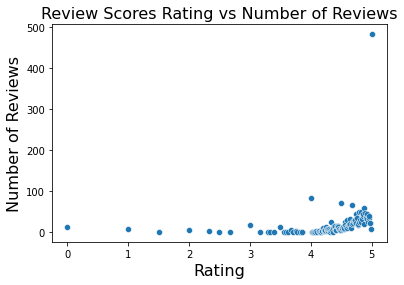

In [104]:
import seaborn as sns

#Get the number of times a review score rating ocurred.
counts = listings.groupby(by=['review_scores_rating']).count()
counts = counts.filter(['id', 'review_scores_rating'], axis=1).reset_index()

# create and display the scatter plot
graph = sns.scatterplot(x="review_scores_rating", y="id", data = counts)

#specify the title
title = "Review Scores Rating vs Number of Reviews"

#set the title of the plot
graph.set_title(title, size = 16)

#add labels to the axes  
graph.set_xlabel("Rating", size = 16)
graph.set_ylabel("Number of Reviews", size = 16)

#The scatter-plot has shown that there is a significant amount of higher rating reviews compared to the lower ones
# in our original dataset.

Scatter-plot visualization:
<img src="https://i.ibb.co/R0d9507/Screen-Shot-2021-12-10-at-6-55-02-PM.png" alt="vis-false-headlines" width=600>

### 3.3. Model Training

### Splitting Data into Training, Validation, and Testing Sets

In [73]:
# Text vectorizer/bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Set features and target arrays to split data
features = merged_data["comments"]
target = merged_data["review_scores_rating"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

# Set validation data to 10% of training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .10)

# create the vocabulary based on the training data, using stop words (would've done bigrams, but RFE took over 10 minutes and
# still didn't finish)
vect = CountVectorizer(stop_words = "english").fit(X_train.values.astype('U'))
vect.fit(X_train.values.astype('U'))

#encode and transform data sets for words based on the vocabulary, also X_test for last testing data
X_train_vectorized = vect.transform(X_train.values.astype('U'))
X_validation_vectorized = vect.transform(X_val.values.astype('U'))
X_test_vectorized = vect.transform(X_test.values.astype('U'))

### RFE for Feature Selection (might take a few minutes to load)

In [74]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

#select 100 words out of the original 4308
select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 100)

#fit RFE to the training data
select.fit(X_train_vectorized, y_train)

#only the selected features are retained for the vectorized sets.
X_train_selected = select.transform(X_train_vectorized)
X_val_selected = select.transform(X_validation_vectorized)
X_test_selected = select.transform(X_test_vectorized)

### Grid Search for Hyperparameter Tuning

#### Apply 3 Machine Learning Algorithms (DecisionTreeClassifier, LogisticRegression, MultinomialNB)
#### Train algorithms with the Training Set


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

# List of desired algorithms which we wish to test.
est = {'mnb': MultinomialNB(), 'lr':LogisticRegression(), 'tree':DecisionTreeClassifier()}

# For each algorithm, specify 3 different parameters by which we can find the optimal parameter.
params = {'mnb':{'alpha':[1, 0.1, 10]}, 'lr':{"max_iter":[1, 10, 100]},'tree':{"max_depth":[1, 10, 100]}}

# For each algorithm, find the best esimator, parameter, cross-validation score, and the Validation set score.
for key, value in est.items():
    for param, y in params.items():
        if key == param:
            grid_search = GridSearchCV(value, y, cv=5)
            grid_search.fit(X=X_train_selected, y=y_train)
            print(key + " Best estimator: ", grid_search.best_estimator_)
            print(key + " Best parameters: ", grid_search.best_params_)
            print(key + " Best cross-validation score: ", grid_search.best_score_)
            print(key + " Validation set score: ", grid_search.score(X_val_selected, y_val))


# This iteration shows that MultinomialNB with an alpha=0.1 provides the best cross-validation score and Validation 
# set scores, suggesting that is the best model for us to use.

mnb Best estimator:  MultinomialNB(alpha=0.1)
mnb Best parameters:  {'alpha': 0.1}
mnb Best cross-validation score:  0.6111111111111112
mnb Validation set score:  0.6111111111111112
lr Best estimator:  LogisticRegression()
lr Best parameters:  {'max_iter': 100}
lr Best cross-validation score:  0.6049382716049383
lr Validation set score:  0.5222222222222223
tree Best estimator:  DecisionTreeClassifier(max_depth=100)
tree Best parameters:  {'max_depth': 100}
tree Best cross-validation score:  0.5703703703703704
tree Validation set score:  0.5


#### Comparing All Features Model to Previous Selected Features

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

est = {'mnb': MultinomialNB(), 'lr':LogisticRegression(), 'tree':DecisionTreeClassifier()}

params = {'mnb':{'alpha':[1, 0.1, 10]}, 'lr':{"max_iter":[1, 10, 100]},'tree':{"max_depth":[1, 10, 100]}}

for key, value in est.items():
    for param, y in params.items():
        if key == param:
            grid_search = GridSearchCV(value, y, cv=5)
            grid_search.fit(X=X_train_vectorized, y=y_train)
            print(key + " Best estimator: ", grid_search.best_estimator_)
            print(key + " Best parameters: ", grid_search.best_params_)
            print(key + " Best cross-validation score: ", grid_search.best_score_)
            print(key + " Validation set score: ", grid_search.score(X_validation_vectorized, y_val))


# Results show that with all features, the accuracy has decreased compared to when we only selected 100 features.

mnb Best estimator:  MultinomialNB(alpha=1)
mnb Best parameters:  {'alpha': 1}
mnb Best cross-validation score:  0.5765432098765432
mnb Validation set score:  0.6
lr Best estimator:  LogisticRegression(max_iter=1)
lr Best parameters:  {'max_iter': 1}
lr Best cross-validation score:  0.562962962962963
lr Validation set score:  0.6111111111111112
tree Best estimator:  DecisionTreeClassifier(max_depth=100)
tree Best parameters:  {'max_depth': 100}
tree Best cross-validation score:  0.5345679012345679
tree Validation set score:  0.4777777777777778


### 3.4. Model Optimization

### Evaluate Performance of Algorithms

In [110]:
# Comparing MNB with alpha of 10
from sklearn.metrics import classification_report
model = MultinomialNB(alpha=10)

# Fit the model based on the training data.
model.fit(X_train_selected, y_train)

predicted = model.predict(X=X_val_selected)
expected = y_val

# Evalulate the performance of our algorithms based on multiple metrics.
class_report = classification_report(y_true=expected, y_pred=predicted)
print (class_report)

# Find prediction accuracy for the given algorithm and parameter.
print("Prediction accuracy on the training data:", format(model.score(X_train_selected, y_train)*100, ".2f"))
print("Prediction accuracy on the validation data:", format(model.score(X_val_selected, y_val)*100, ".2f"))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55        47
           1       0.54      0.63      0.58        43

    accuracy                           0.57        90
   macro avg       0.57      0.57      0.57        90
weighted avg       0.57      0.57      0.57        90

Prediction accuracy on the training data: 66.54
Prediction accuracy on the validation data: 56.67


In [108]:
# Comparing logistic regression w/ max-iter of 10.

from sklearn.metrics import classification_report
model = LogisticRegression(max_iter=10)

# Fit the model based on the training data.
model.fit(X_train_selected, y_train)

predicted = model.predict(X=X_val_selected)
expected = y_val

# Evalulate the performance of our algorithms based on multiple metrics.
class_report = classification_report(y_true=expected, y_pred=predicted)
print (class_report)

# Find prediction accuracy for the given algorithm and parameter.
print("Prediction accuracy on the training data:", format(model.score(X_train_selected, y_train)*100, ".2f"))
print("Prediction accuracy on the validation data:", format(model.score(X_val_selected, y_val)*100, ".2f"))

              precision    recall  f1-score   support

           0       0.54      0.53      0.54        47
           1       0.50      0.51      0.51        43

    accuracy                           0.52        90
   macro avg       0.52      0.52      0.52        90
weighted avg       0.52      0.52      0.52        90

Prediction accuracy on the training data: 67.65
Prediction accuracy on the validation data: 52.22


In [109]:
# checking that suboptimal parameters lowers score.
from sklearn.metrics import classification_report
model = MultinomialNB(alpha=0.1)

model.fit(X_train_selected, y_train)

predicted = model.predict(X=X_val_selected)
expected = y_val
class_report = classification_report(y_true=expected, y_pred=predicted)
print (class_report)

print("Prediction accuracy on the training data:", format(model.score(X_train_selected, y_train)*100, ".2f"))
print("Prediction accuracy on the validation data:", format(model.score(X_val_selected, y_val)*100, ".2f"))

# The prediction accuracy score on the training data is the highest here, compared to the previous cell
# where the alpha was 10, and when we used LogisticRegression instead of MNB,
# suggesting that the MNB with an alpha of 0.1 is optimal, as the gridsearch suggested.

print("The cross-validation score and the prediction accuracy on the training data are not 100 but not super low"
      + "either suggesting neither over or underfitting significantly.")

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        47
           1       0.58      0.67      0.62        43

    accuracy                           0.61        90
   macro avg       0.61      0.61      0.61        90
weighted avg       0.62      0.61      0.61        90

Prediction accuracy on the training data: 69.14
Prediction accuracy on the validation data: 61.11
The cross-validation score and the prediction accuracy on the training data are not 100 but not super loweither suggesting neither over or underfitting significantly.


### 3.5. Model Testing

In [111]:
from sklearn.metrics import classification_report
model = MultinomialNB(alpha=0.1)
model.fit(X_train_selected, y_train)

predicted = model.predict(X=X_test_selected)
expected = y_test
class_report = classification_report(y_true=expected, y_pred=predicted)
print (class_report)

print("Prediction accuracy on the training data:", format(model.score(X_train_selected, y_train)*100, ".2f"))
print("Prediction accuracy on the test data:", format(model.score(X_test_selected, y_test)*100, ".2f"))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52       148
           1       0.55      0.61      0.58       152

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.55      0.55       300

Prediction accuracy on the training data: 69.14
Prediction accuracy on the test data: 55.00


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

We compared the results of Logistic Regression, Multinomial Naive Bayes and Decision Tree Classifier to determine
which algorithm(s) will be the best to tackle this problem.
    
   We used GridSearch for hyperparameter tuning to determine the best parameters and to check whether our model is overfitted or not. Best on the result of the GridSearch, while we are trying to determine which is the best estimator for our model. The results of our algorithms change with each instance that we run it, but we found that on average, the algorithm that has the highest cross validation score and validation set score is the Multinomial Naive Bayes algorithm. The best parameter to use for this algorithm is 'alpha=0.1'. The cross-validation score and the prediction accuracy on the training data are not 100 but not super low which suggest neither over or underfitting significantly. 
   
   Based off of these results, the algorithm that we used for our predictive model is Multinomial Naive Bayes. Based on our findings, it is safe to say that we are able to use the features in our dataset to predict the outcome variable we identified using the algorithms we applied. There is one issue that may arise for ethical implications on this project. The issue is that we use the median of the average ratings in our data to make it easier to use for us because the majority of the reviews are all heavily skewed toward a perfect 5 star rating. Other dataset bias can come from how there aren't many reviews for some listings while other listings have a great amount of reviews. For the sake of our project we manipulated our dataset to only have one review for each unique listing so this may cause a fair amount of bias in our dataset. This is because one review for a specific listing can be an outlier in the listing's general reception amongst other reviews by users.

For any future work we can possibly use a less biased dataset as we did for the sake of this project to possibly glean any further insights. We can also apply our work on this project to other regions and see what kind of data is yielded there. This may show us that different algorithms are more favorable to use compared to the ones that we declared to be the best in our project. Also, other algorithms besides the three that we used can be applied to see any different results.

## Answers to our questions from Part 1

   Upon our implementation of our algorithms we can answer the questions we have asked ourselves in Part 1 of this project:

   * Out of the three algorithms (Logistic Regression, Multinomial Naive Bayes, Decision Tree), which one yields the highest classification accuracy result? Which one out of the three algorithms can we use to predict whether a listing is a "Best" place to stay in or just a "Decent" place to stay in?

      Multinomial Naive Bayes was the machine learning algorithm that yielded the highest classification accuracy result. Multinomial Naive Bayes is also the algorithm that we can use to predict our binary target variable.

* How many "Best" listings are there relative to how many "Decent" listings. Is there a wide difference?

   The amount of "Best" listings is actually not too far from the amount of "Decent" listings because of the high saturation of very highly rated reviews in the dataset. If we wanted to pinpoint it further we would have to be stricter with what exact score we determine to be a "Best" listing.

* Do the results change at all when run with a different instance? This can situation can possibly arise as new reviews are constantly being written every day for each listing on Airbnb. Or is it the case that these new entries do not skew the results of our algorithms?

   The results do change slightly when run with different instances but it does not create a very large disparity amongst one another. Overall, the majority of the instances show that Multinomial Naive Bayes is still the best machine learning algorithm to use for this project.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">